In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=3, linewidth=500, threshold=500, suppress=True, edgeitems=5)

pd.set_option('display.max_rows', 60)
pd.set_option('display.min_rows', 30)
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 40)

%load_ext autoreload
%autoreload 2

%matplotlib ipympl



In [2]:
import networkx as nx
import subprocess
import matplotlib as mpl
from matplotlib.collections import LineCollection


In [3]:
def generate_random_circle(center, radius):
    
    r = radius * np.random.uniform(0, 1) ** 0.5
    theta = np.random.uniform(0, 2 * np.pi)
    
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)
    
    return x, y


def create_graph_2_class():

    np.random.seed(0)

    N = 300

    colors = ['tab:red', 'tab:blue']

    centers = [[0, 0], [1, 0]]
    radii = [0.4, 0.4]

    labels = np.random.choice([0, 1], size=N, p=[0.6, 0.4])

    colors = [colors[i] for i in labels]

    pos = {i: generate_random_circle(centers[labels[i]], radii[labels[i]]) for i in range(N)}

    ps = [[0.8, 0.2],
          [0.2, 0.8]]

    G = nx.Graph()

    for node in range(N):
        
        G.add_node(node)
        
    for node in range(N):
        
        for j in range(np.random.randint(2, 4)):
            
            party = np.random.choice([0, 1], p=ps[labels[node]])
            friend = np.random.choice(np.argwhere((labels == party) & (np.arange(N) != node)).ravel())
        
            G.add_edge(node, friend)

    return G, colors, pos


def create_graph_multi_class():

    np.random.seed(0)

    N = 500

    parties = {'Labour': 0.35, 'Conservative': 0.4, 'Lib Dem': 0.1, 'Green': 0.1, 'Ukip': 0.05}

    colors = ['tab:red', 'tab:blue', 'gold', 'tab:green', 'tab:purple']

    centers = [[0, 1], [1, 1], [0.5, 0.2], [-0.2, 0.2], [1.2, 0.2]]
    radii = [0.3, 0.3, 0.3, 0.3, 0.3]

    labels = np.random.choice([0, 1, 2, 3, 4], size=N, p=[0.35, 0.4, 0.1, 0.1, 0.05])

    colors = [colors[i] for i in labels]

    pos = {i: generate_random_circle(centers[labels[i]], radii[labels[i]]) for i in range(N)}

    ps = [[0.5, 0.2, 0.1, 0.1, 0.1], 
        [0.2, 0.5, 0.2, 0.0, 0.1], 
        [0.2, 0.2, 0.5, 0.1, 0.0], 
        [0.3, 0.0, 0.1, 0.6, 0.0],
        [0.1, 0.3, 0.0, 0.0, 0.6]]


    G = nx.Graph()

    for node in range(N):
        
        G.add_node(node)
        
    for node in range(N):
        
        for j in range(np.random.randint(2, 4)):
            
            party = np.random.choice([0, 1, 2, 3, 4], p=ps[labels[node]])
            friend = np.random.choice(np.argwhere((labels == party) & (np.arange(N) != node)).ravel())
        
            G.add_edge(node, friend)

    return G, colors, pos

In [4]:
def plot_line(ax, x1, x2, col1, col2, lw=1, parts=5, alpha=1.0):
    
    x = np.linspace(x1[0], x2[0], parts)
    y = np.linspace(x1[1], x2[1], parts)
    cols = np.linspace(0, 1, parts)
    
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    c1 = mpl.colors.to_rgba(col1)
    c2 = mpl.colors.to_rgba(col2)
    
    my_cmap = mpl.colors.ListedColormap(
        np.array([np.linspace(c1[0], c2[0], parts), 
                  np.linspace(c1[1], c2[1], parts), 
                  np.linspace(c1[2], c2[2], parts), 
                  np.linspace(alpha, alpha, parts)]).T
    )
    
    lc = LineCollection(segments, cmap=my_cmap)
    lc.set_array(cols)
    lc.set_linewidth(lw)
    line = ax.add_collection(lc)


def plot_graph(G, colors, pos):

    fig, ax = plt.subplots()

    for n1, n2 in G.edges:
        
        plot_line(ax, pos[n1], pos[n2], colors[n1], colors[n2], parts=5, alpha=0.25, lw=0.5)

    nx.draw_networkx_nodes(G, pos=pos, node_color=colors, node_size=45, alpha=0.8)

    ax.set_aspect(1)

    plt.axis('off')



def plot_multigraph(save=True):

    G, colors, pos = create_graph_multi_class()

    plot_graph(G, colors, pos)

    if save:

        plt.savefig('multiclass_graph.pdf')

        subprocess.run(['pdfcrop', 'multiclass_graph.pdf', 'multiclass_graph.pdf'])


def plot_2_class(save=True):

    G, colors, pos = create_graph_2_class()

    plot_graph(G, colors, pos)

    if save:

        plt.savefig('2class_graph.pdf')

        subprocess.run(['pdfcrop', '2class_graph.pdf', '2class_graph.pdf'])

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `multiclass_graph.pdf'.


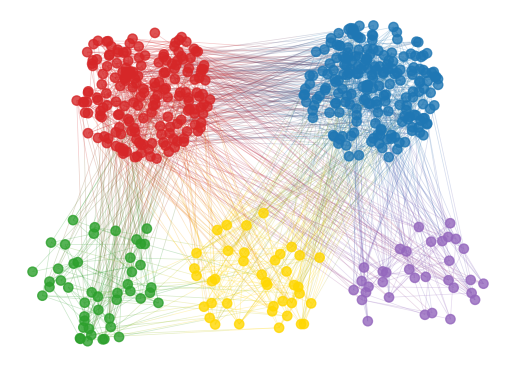

In [38]:
plot_multigraph(True)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `2class_graph.pdf'.


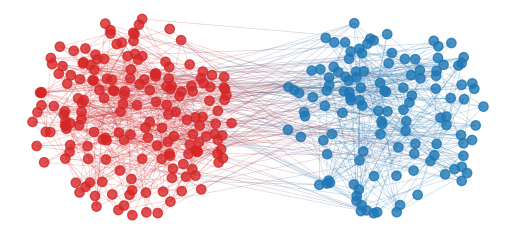

In [39]:
plot_2_class(True)

In [7]:
from ndgsp.graph.graphs import ProductGraph
from ndgsp.graph.filters import UnivariateFilterFunction

2023-06-16 15:43:10.592649: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Using Jax backend with device TFRT_CPU_0


In [4]:
def plot_binary_LGSR():

    np.random.seed(1)

    g = ProductGraph.lattice(100, 100)

    fil = UnivariateFilterFunction.diffusion(80)

    F0 = np.random.normal(size=(100, 100))

    F0 -= F0.mean()

    Fs = []
    Ms = []

    for beta in [20, 40, 80]:

        fil = UnivariateFilterFunction.diffusion(beta)

        F = 50 * g.filter(F0, fil)

        M = 1 / (1 + np.exp(-F))

        Fs.append(F)
        Ms.append(M)

    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(11, 11), sharex=True, sharey=True)

    for i in range(3):

        im1 = axes[i, 0].imshow(Fs[i], cmap='viridis')
        im2 = axes[i, 1].imshow(Ms[i], vmin=0, vmax=1, cmap='gist_gray')
        im3 = axes[i, 2].imshow(Ms[i] > 0.5,  cmap=mpl.colors.ListedColormap(['black', 'white']), interpolation='nearest')

        axes[0, i].axis('off')
        axes[1, i].axis('off')
        axes[2, i].axis('off')


    ax1 = fig.add_axes([0.09, -0.07, 0.3, 1])
    ax1.axis('off')
    plt.colorbar(im1, ax=ax1, location='bottom', shrink=0.7)


    ax2 = fig.add_axes([0.363, -0.07, 0.3, 1])
    ax2.axis('off')
    plt.colorbar(im2, ax=ax2,  ticks=[0, 0.25, 0.5, 0.75, 1], location='bottom', shrink=0.7)

    ax3 = fig.add_axes([0.635, -0.07, 0.3, 1])
    ax3.axis('off')
    plt.colorbar(im3, ax=ax3,  ticks=[0, 1], location='bottom', shrink=0.7)

    # cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'])

    # plt.savefig('logistic_gsr_plot.pdf')


In [6]:
from numpy import kron, diag, eye as I, ones, zeros, exp, log
from numpy.random import normal, randint

In [39]:
def check_grad_and_hess_multiclass_LGSR():

    C = 3
    N = 5

    np.random.seed(0)

    f = normal(size=C * N)
    y = pd.get_dummies(pd.Series(randint(C, size=N))).values.ravel()
    s = randint(2, size=N)

    A = normal(size=(N * C, N * C))
    Hi2 = A @ A.T

    def mu(f):
        return exp(f) / kron(kron(I(N), ones(C)) @ exp(f), ones(C))

    def nll(f):
        return -(kron(s, ones(C)) * log(mu(f) ** y)).sum() + 0.5 * f @ Hi2 @ f

    def grad(f):
        return kron(s, ones(C)) * (mu(f) - y) + Hi2 @ f

    def grad_num(f):
        
        out = np.zeros_like(f.ravel())

        for i in range(len(out)):

            f_ = f.copy().ravel()
            f_[i] += 1e-6
            out[i] = (nll(f_.reshape(f.shape)) - nll(f)) / 1e-6

        return out.reshape(f.shape)

    def hess(f):

        def d(i):
            out = np.zeros((N, N))
            out[i, i] = 1
            return out

        m = mu(f).reshape(N, C)

        return diag(kron(s, ones(C))) @ (diag(mu(f)) - sum(kron(d(i), np.outer(m[i, :], m[i, :])) for i in range(N))) + Hi2

    def hess_num(f):

        dx = 1e-4
        N = len(f)
        out = np.zeros((N, N))

        for i in range(N):
            for j in range(N):
                
                def deriv(g, x, k):
                    x_ = x.copy()
                    _x = x.copy()
                    x_[k] += dx / 2
                    _x[k] -= dx / 2
                    return (g(x_) - g(_x)) / dx

                out[i, j] = deriv(lambda y: deriv(nll, y, i), f, j)

        return out
    

    print(np.allclose(grad(f), grad_num(f), atol=1e-4))
    print(np.allclose(hess(f), hess_num(f), atol=1e-4))




In [40]:
check_grad_and_hess_multiclass_LGSR()

True
True


In [19]:
import sys
sys.path.append('..')

from utils.plotting import to_colors

In [32]:
def plot_3d_F_slices():

    g = ProductGraph.lattice(20, 20)

    fil = UnivariateFilterFunction.diffusion(10)

    np.random.seed(3)

    F = np.array([50 * g.filter(np.random.normal(size=(20, 20)), fil)  for i in range(20)]).transpose(1, 2, 0)

    # prepare some coordinates
    x, y, z = np.indices((20, 20, 20))

    # draw cuboids in the top left and bottom right corners, and a link between
    cube1 = (y == 0)
    cube2 = (y == 9)
    cube3 = (y == 19)

    # combine the objects into a single boolean array
    voxelarray = cube1 | cube2 | cube3 

    # set the colors of each object
    colors = np.empty(voxelarray.shape, dtype=object)
    cols =  to_colors(F, alpha=0.8, vmin=-1, vmax=4)

    colors[cube1] = to_colors(F[:, :, 0], alpha=0.8, cmap='Reds').ravel()
    colors[cube2] = to_colors(F[:, :, 9], alpha=0.8, cmap='Greens').ravel()
    colors[cube3] = to_colors(F[:, :, 19], alpha=0.8, cmap='Blues').ravel()

    # and plot everything
    ax = plt.figure().add_subplot(projection='3d')

    ax.voxels(voxelarray, facecolors=colors)


    # Get rid of the panes
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the ticks
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])


    ax.set_ylim(0, 30)
    ax.view_init(elev=23.66, azim=-50)


    # plt.savefig('F.pdf')

    # subprocess.run(['pdfcrop', 'F.pdf', 'F.pdf'])

    return F

/tmp/ipykernel_138143/1380048441.py:37: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_138143/1380048441.py:38: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_138143/1380048441.py:39: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_138143/1380048441.py:42: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_138143/1380048441.py:43: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Ma

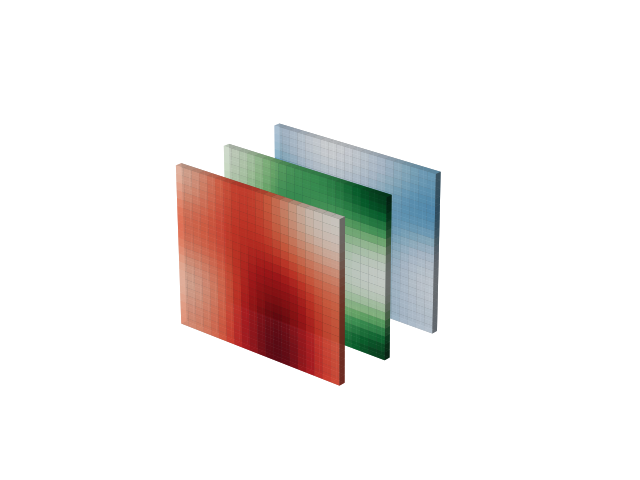

In [33]:
F = plot_3d_F_slices()

In [36]:
def plot_3d_Mu_slices(F):

    F = 0.4 * F 

    Mu = np.zeros_like(F)

    Mu[:, :, 0] = np.exp(F[:, :, 0]) / sum(np.exp(F[:, :, i]) for i in [0, 9, 19])
    Mu[:, :, 9] = np.exp(F[:, :, 9]) / sum(np.exp(F[:, :, i]) for i in [0, 9, 19])
    Mu[:, :, 19] = np.exp(F[:, :, 19]) / sum(np.exp(F[:, :, i]) for i in [0, 9, 19])

    # prepare some coordinates
    x, y, z = np.indices((20, 20, 20))

    # draw cuboids in the top left and bottom right corners, and a link between
    cube1 = (y == 0)
    cube2 = (y == 9)
    cube3 = (y == 19)

    # combine the objects into a single boolean array
    voxelarray = cube1 | cube2 | cube3 

    # set the colors of each object
    colors = np.empty(voxelarray.shape, dtype=object)
    cols =  to_colors(Mu, alpha=0.8, vmin=-1, vmax=4)

    colors[cube1] = to_colors(Mu[:, :, 0], alpha=0.8, cmap='Reds').ravel()
    colors[cube2] = to_colors(Mu[:, :, 9], alpha=0.8, cmap='Greens').ravel()
    colors[cube3] = to_colors(Mu[:, :, 19], alpha=0.8, cmap='Blues').ravel()

    # and plot everything
    ax = plt.figure().add_subplot(projection='3d')

    ax.voxels(voxelarray, facecolors=colors)


    # Get rid of the panes
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the ticks
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])


    ax.set_ylim(0, 30)
    ax.view_init(elev=23.66, azim=-50)

    # plt.savefig('Mu.pdf')

    # subprocess.run(['pdfcrop', 'Mu.pdf', 'Mu.pdf'])

    return Mu

/tmp/ipykernel_138143/1442406830.py:37: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_138143/1442406830.py:38: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_138143/1442406830.py:39: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_138143/1442406830.py:42: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_138143/1442406830.py:43: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Ma

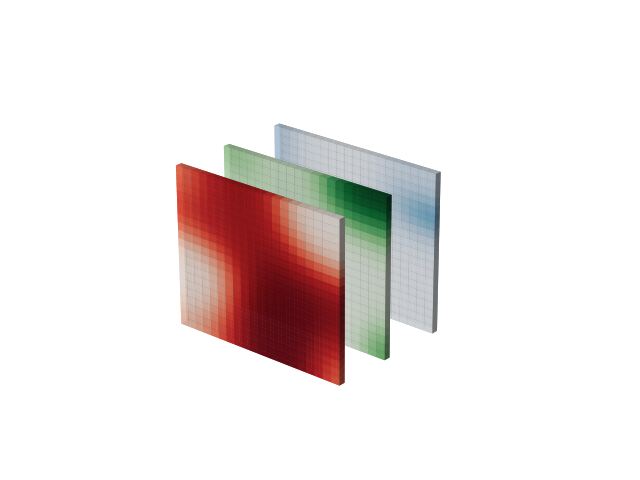

In [37]:
Mu = plot_3d_Mu_slices(F)

In [29]:
def plot_most_likely_classification(Mu):

    plt.figure()

    d = np.rot90(np.array([Mu[:, :, 0], Mu[:, :, 9], Mu[:, :, 19]]).transpose(1, 2, 0).argmax(-1))

    im = plt.imshow(d, cmap=mpl.colors.ListedColormap(['tab:red', 'tab:green', 'tab:blue']), interpolation='nearest', alpha=0.8)

    plt.axis('off')

    # plt.savefig('Y.pdf')

    # subprocess.run(['pdfcrop', 'Y.pdf', 'Y.pdf'])

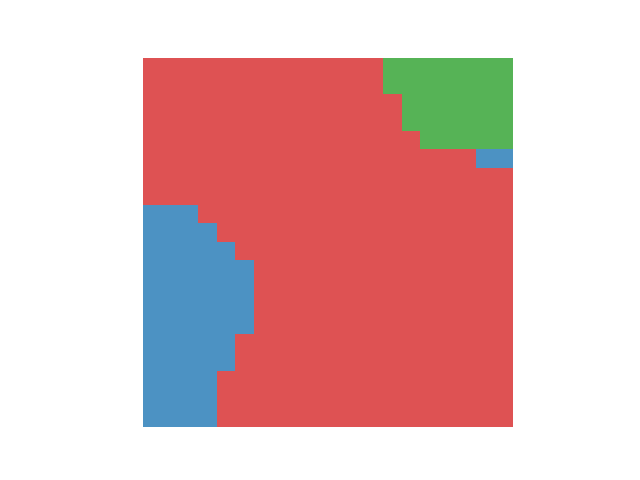

In [38]:
plot_most_likely_classification(Mu)

In [109]:
from numpy import kron, eye as I, diag, exp, ones, log, zeros
from numpy.random import normal

In [41]:
def check_grad_and_hess_multiclass_LRNC():

    N = 5
    C = 3
    M = 2

    np.random.seed(0)

    X = normal(size=(N, M))
    W = normal(size=(M, C))
    B = normal(size=(N, C))
    s = np.array([1, 0, 0, 1, 1])
    Y = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 1, 0], [0, 0, 1]])

    b = B.reshape(-1)
    w = W.reshape(-1)
    y = Y.reshape(-1)
    theta = np.concatenate([b, w])

    A = normal(size=(N, N))
    Hi2 = A @ A.T

    HH = np.block([[kron(Hi2, I(C)), zeros((N * C, M * C))], [zeros((M * C, N * C)), I(M * C)]])


    def mu(theta):
        f = np.concatenate([I(N * C), kron(X, I(C))], axis=1) @ theta
        return exp(f) / kron(kron(I(N), ones(C)) @ exp(f), ones(C))
        

    def xi(theta):
        return (-y * log(mu(theta))).sum() + 0.5 * theta @ HH @ theta


    def grad(theta):
        return np.vstack([kron(diag(s), I(C)), kron(X.T @ diag(s), I(C))]) @ (mu(theta) - y) + HH @ theta


    def grad_num(theta):
        
        out = np.zeros_like(theta.ravel())

        for i in range(len(out)):

            theta_ = theta.copy().ravel()
            theta_[i] += 1e-6
            out[i] = (xi(theta_.reshape(theta.shape)) - xi(theta)) / 1e-6

        return out.reshape(theta.shape)

    def d(i):
        out = np.zeros((N, N))
        out[i, i] = 1
        return out

    def R(theta):

        m = mu(theta).reshape(N, C)

        return kron(diag(s), I(C)) @ (diag(mu(theta)) - sum(kron(d(i), np.outer(m[i, :], m[i, :])) for i in range(N)))


    def hess(theta):

        Rm = R(theta)
        Xc = kron(X, I(C))

        return np.block([[Rm + kron(Hi2, I(C)), Rm @ Xc], [Xc.T @ Rm, Xc.T @ Rm @ Xc + I(M * C)]])


    def hess_num(theta):

        dx = 1e-4
        out = np.zeros((len(theta), len(theta)))

        for i in range(len(theta)):
            for j in range(len(theta)):
                
                def deriv(g, x, k):
                    x_ = x.copy()
                    _x = x.copy()
                    x_[k] += dx / 2
                    _x[k] -= dx / 2
                    return (g(x_) - g(_x)) / dx

                out[i, j] = deriv(lambda y: deriv(xi, y, i), theta, j)

        return out
    
    print(np.allclose(grad(theta), grad_num(theta), atol=1e-4))
    print(np.allclose(hess(theta), hess_num(theta), atol=1e-4))


In [42]:
check_grad_and_hess_multiclass_LRNC()

True
True
